# Introdução

Este projeto tem como objetivo explorar e analisar o famoso conjunto de dados do Titanic, que contém informações sobre os passageiros do navio que naufragou em 1912. A análise busca entender fatores que influenciaram as chances de sobrevivência dos passageiros, como:

- Classe social;
- Gênero;
- Idade;
- Tarifa paga;
- Porto de embarque.

A partir desses dados, é possível identificar padrões e tendências que ajudam a contar a história por trás do desastre, proporcionando insights importantes sobre como certas características impactaram as chances de sobrevivência.

A metodologia utilizada inclui a limpeza e pré-processamento dos dados, seguido por análises exploratórias que destacam as variáveis mais significativas. Além disso, visualizações serão geradas para facilitar a interpretação dos resultados.

In [4]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("train.csv")

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.shape

(891, 12)

In [7]:
print(f"Temos {df.shape[0]} linhas e {df.shape[1]} colunas.")

Temos 891 linhas e 12 colunas.


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


O dataset possui valores nulos. As colunas que contêm valores nulos são:

- Age: possui 714 valores não nulos, ou seja, 177 valores nulos.
- Cabin: possui 204 valores não nulos, ou seja, 687 valores nulos.
- Embarked: possui 889 valores não nulos, ou seja, 2 valores nulos.

In [11]:
df['Age'] = df['Age'].fillna(df['Age'].median()) 
df['Age'] = df['Age'].astype(int) 

In [15]:
df['Cabin'] = df['Cabin'].fillna('Unknown')

In [17]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [21]:
df['Fare'] = df['Fare'].round(2)

In [12]:
df['Survived'] = df['Survived'].replace({0: 'No', 1: 'Yes'})

In [43]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.345679,0.523008,0.381594,32.204366
std,257.353842,0.836071,13.028212,1.102743,0.806057,49.693414
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,22.000000,0.000000,0.000000,7.910000
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.450000
75%,668.500000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.330000


- A maioria dos passageiros está na 3ª classe, pois o valor da mediana para Pclass é 3.
- A menor idade é 0 (indica que há bebês a bordo) e a maior é 80, a idade média é 29, com muitos passageiros jovens e poucos mais velhos.
- A média de aproximadamente 0.52 irmãos ou cônjuges (Sibsp) por passageiro indica que a maioria viaja sozinha ou com apenas um membro da família.
- Com uma média de cerca de 0.38, a maioria dos passageiros não viaja com pais ou filhos (Parch). 
- A tarifa (Fare) apresenta um alto desvio padrão (49,69), sugerindo que há grande variação no preço pago pelos passageiros, o preço médio da tarifa é 32,20.

In [29]:
df['Survived'].value_counts(normalize=True) * 100

Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64

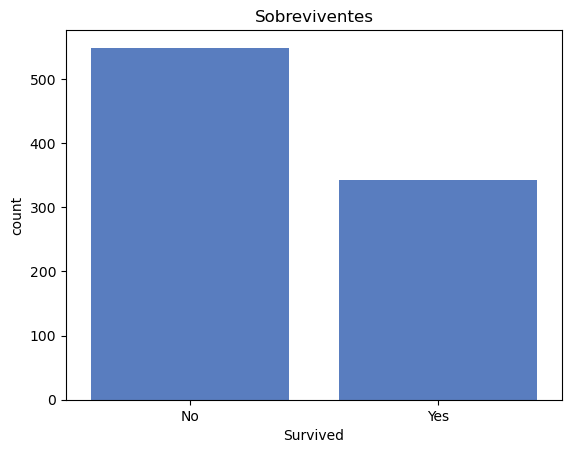

In [22]:
sns.set_palette("muted")

sns.countplot(x='Survived', data=df)
plt.title('Sobreviventes')
plt.show()

É possível verificar que 61,61% das pessoas não sobreviveram e 38.38% das pessoas sobreviveram 

In [37]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

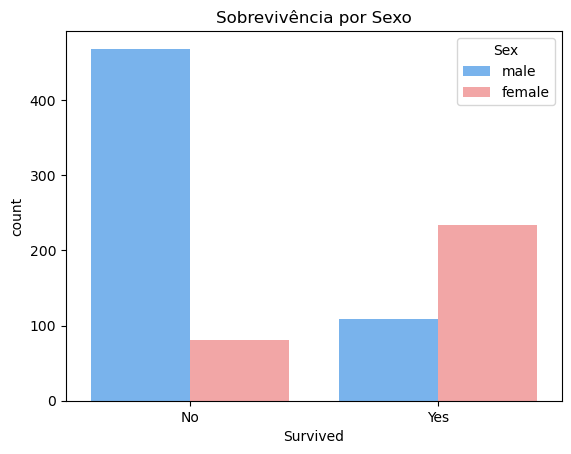

In [24]:
sns.countplot(x='Survived', hue='Sex', data=df, palette=['#66b3ff', '#ff9999'])
plt.title('Sobrevivência por Sexo')
plt.show()

Essa distribuição apresenta que as mulheres tiveram mais chance de sobrevivência do que os homens.

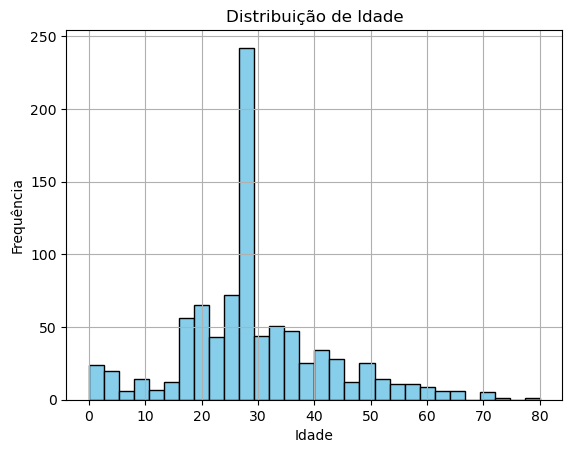

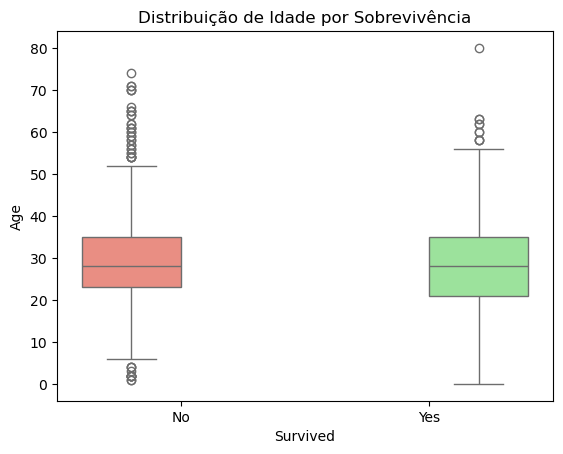

In [75]:
df['Age'].hist(bins=30, edgecolor='black', color='skyblue')
plt.title('Distribuição de Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

sns.boxplot(x='Survived', y='Age', hue='Survived', data=df, palette={'Yes': 'lightgreen', 'No': 'salmon'}, dodge=True)
plt.title('Distribuição de Idade por Sobrevivência')
plt.show()

- A maioria dos passageiros tem entre 22 e 35 anos, com o pico de frequência em torno dos 30 anos.
- Há uma presença considerável de crianças e adolescentes (de 0 a 10 anos) e um número menor de passageiros idosos (acima de 50 anos).
- Com relação a distribuição de idade por sobrevivência, a faixa etária mais jovem parece ter uma vantagem em termos de sobrevivência. Já para os passageiros mais velhos, a chance de não sobreviver parece ser maior, como mostrado pelos outliers do lado dos que não sobreviveram.

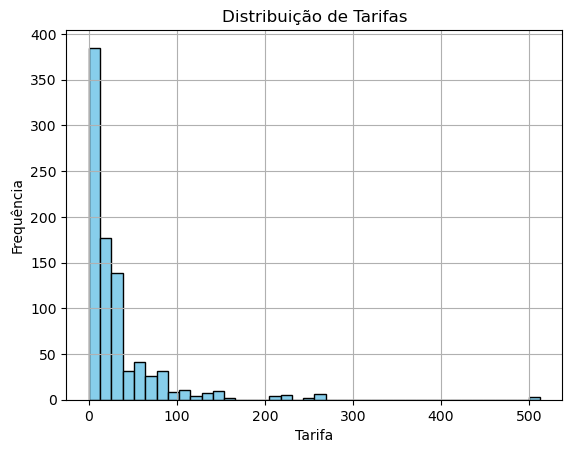

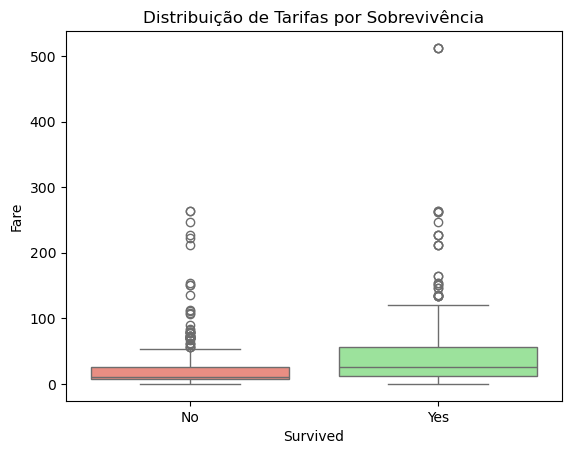

In [14]:
df['Fare'].hist(bins=40, edgecolor='black', color='skyblue')
plt.title('Distribuição de Tarifas')
plt.xlabel('Tarifa')
plt.ylabel('Frequência')
plt.show()

sns.boxplot(x='Survived', y='Fare', hue='Survived', data=df, palette={'Yes': 'lightgreen', 'No': 'salmon'})
plt.title('Distribuição de Tarifas por Sobrevivência')
plt.show()

- A maioria das tarifas está concentrada abaixo de 80 unidades, com um pico alto logo abaixo de 10 unidades.
- A tarifa acima de 100 e até 500 ocorre, mas é mais raro, ou seja, poucas pessoas pagaram tarifas mais altas. A maioria dos passageiros pagou tarifas baixas, e há uma pequena quantidade de outliers com tarifas muito elevadas.
- Os passageiros que pagaram tarifas mais altas tendem a ter uma taxa de sobrevivência maior. Isso pode ter relação com o fato de que tarifas mais altas provavelmente são das classes mais altas no navio, onde os passageiros podem ter tido acesso mais fácil ao resgate.
- A concentração de passageiros que pagaram tarifas baixas indica que a classe econômica (3ª classe) enfrentou mais dificuldades durante o desastre.

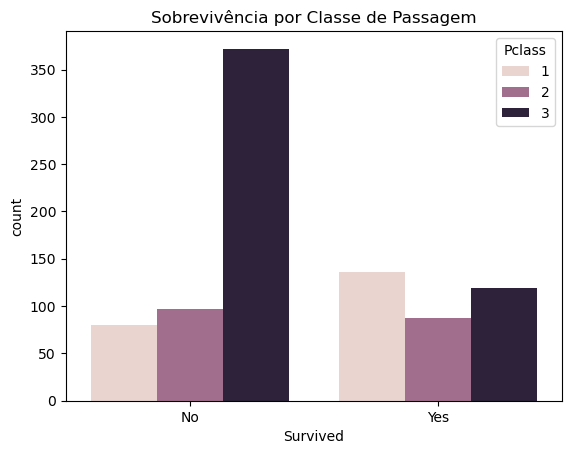

In [53]:
df['Pclass'].value_counts()

sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Sobrevivência por Classe de Passagem')
plt.show()

- Na distribuição, pode-se confirmar que a 3ª classe foi a mais atingida no acidente, com uma quantidade bem superior as outras de não sobreviventes, já referente a sobreviventes, vemos que a 1ª classe foi priorizada no resgate e postriormente a 2ª classe.

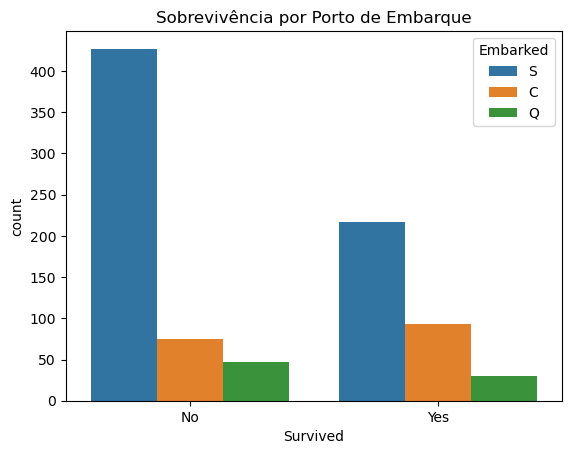

In [17]:
df['Embarked'].value_counts()

palette = {'C': 'lightblue', 'Q': 'salmon', 'S': 'lightgreen'}

sns.countplot(x='Survived', hue='Embarked', data=df)
plt.title('Sobrevivência por Porto de Embarque')
plt.show()

- O maior ponto de embarque foi o ponto S, sendo assim analisando a localização de onde cada passageiro embarcou, é possível identificar que a maioria dos passageiros que não sobreviveram (mais de 400 pesssoas) embarcaram no ponto S e uma menor quantidade embarcaram nos pontos C e Q.
- Em contrapartida, verificando os passageiros que sobreviveram a maioria também embarcou no ponto S, embora a quantidade de sobreviventes seja bem menor do que de não sobreviventes.

# Conclusão
Com base nos gráficos e distribuições analisadas, podemos tirar algumas conclusões sobre os dados:

- Há uma correlação entre o sexo e a sobrevivência, com uma maior proporção de mulheres sobrevivendo em comparação aos homens.
- Os passageiros da 1ª classe parecem ter maior taxa de sobrevivência em comparação àqueles das 3ª classe.
- A faixa etária mais jovem tem mais chances de sobreviver do que a faixa etária mais velha.
- Tarifas mais altas estão associadas a uma maior chance de sobrevivência, com mais acesso ao resgate.
- Passageiros com famílias a bordo têm taxas de sobrevivência menores dos que viajavam sozinhos.
- O maior ponto de embarque e de não sobreviventes foi o ponto S, porém ele também teve a maior taxa de sobreviventes.